In [33]:
from rethink.methods import GridApproximation
import numpy as np
import matplotlib.pyplot as plt 

### Easy

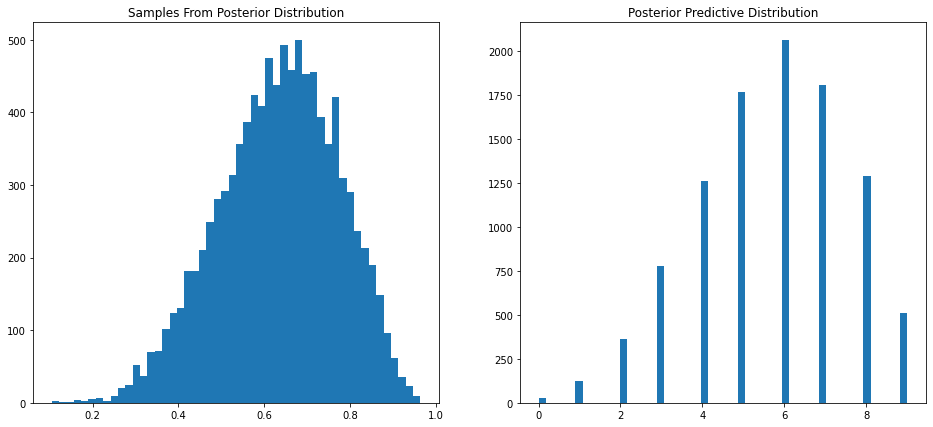

In [34]:
g=1000
prior = np.repeat(1,g)
m = GridApproximation(k=6, n=9, prior=prior, g=g)
m.posterior()

fig, ax = plt.subplots(1,2, figsize=(16,7))
ax[0].hist(m.samples, bins=50)
ax[0].set_title("Samples From Posterior Distribution")
ax[1].hist(m.posterior_predictive_dist, bins=50)
ax[1].set_title("Posterior Predictive Distribution")
plt.show()

In [35]:
# 3E1 - How much posterior prob lies below p = 0.2
print(sum(m.samples<0.2))
# 3E2 - How much posterior prob lies above p = 0.8
print(sum(m.samples>0.8))
# 3E3 - How much posterior prob lies above p = 0.2 and below p = 0.8
print(sum((m.samples<0.8) & (m.samples>0.2)))
# 3E4 - 20% of posterior prob lies below which value?
print(np.percentile(m.samples, q = 20))
# 3E5 - 20% of posterior prob lies above which value?
print(np.percentile(m.samples, q = 80))
# 3E7 Which vale of p contains 66% of the posterior prob, assuming equal prob below and above the interval?
print(np.quantile(m.samples, q = [1/6, 5/6]))

14
1148
8838
0.5145145145145145
0.7587587587587588
[0.49449449 0.77277277]


### Medium

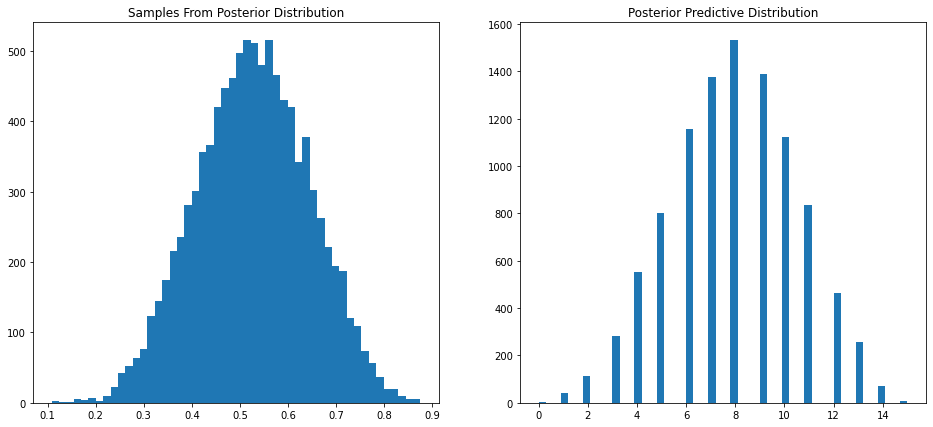

In [36]:
g=1000
prior = np.repeat(1,g)
m = GridApproximation(k=8, n=15, prior=prior, g=g)
m.posterior()

fig, ax = plt.subplots(1,2, figsize=(16,7))

ax[0].hist(m.samples, bins=50)
ax[0].set_title("Samples From Posterior Distribution")
ax[1].hist(m.posterior_predictive_dist, bins=50)
ax[1].set_title("Posterior Predictive Distribution")
plt.show()

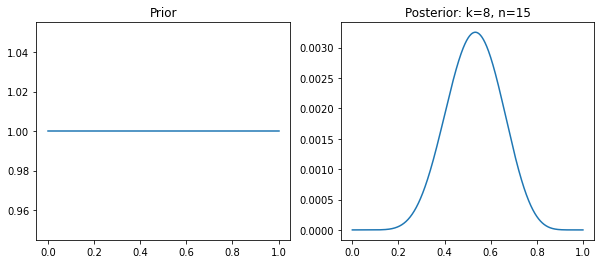

[0.33428428 0.71871872]


0.1531

In [37]:
# 3M1 - Suppose we have 8 waters out of 15 tosses. Construct the same posterior distribution
m.viz()
# 3M2 Calculate 90% credible interval
print(np.quantile(m.samples, q = [0.05, 0.95]))
# 3M3 Calculate posterior probability check. What is the prob of observing 8 waters in 15 tosses?
np.sum(m.posterior_predictive_dist == 8) / m.posterior_predictive_dist.shape[0]